# Subtask 1

In [203]:
from sklearn import datasets
import pandas as pd

In [204]:
digits = datasets.load_iris(as_frame=True)
pandas_frame = digits['frame']

In [205]:
pandas_frame.head() # show how data looks

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [206]:
three_columns = pandas_frame.iloc[: , :3]

three_columns.head() # first 3 columns

,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


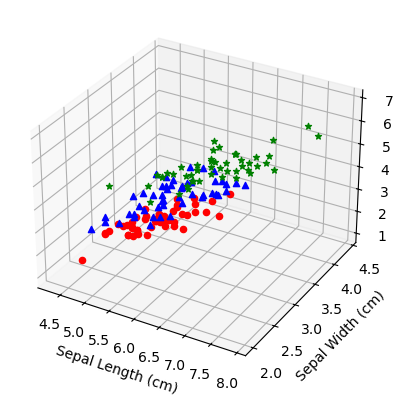

In [207]:
import matplotlib.pyplot as plt
import numpy as np


markers = {0 : "o", 1 : "^", 2 :"*", 3 :"#"}
colors = {0 : "red", 1 : "blue", 2 :"green", 3 :"yellow"}

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# it's not recommended to iterate over a pandas dataframe that's why we will iterate through a numpy array
data_array = pandas_frame.to_numpy()

for row in data_array:
    x_axes = row[0]
    y_axes = row[1]
    z_axes = row[2]
    m = markers[int(row[4])]
    c = colors[int(row[4])]
    ax.scatter(x_axes, y_axes, z_axes, marker=m, color=c)


ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal length (cm)')

plt.show()

Although this graph doesn't tell a lot. We could observe that points cluster into distinctive groups that actually represent our target classes:
- (red) - Iris-Setos
- (blue) - Iris-Versicolour
- (green) - Iris-Virginica

Also, there could be observed some far away points from cluster concentration which could mean there are some anomalies that will be ignored for the scope of this homework.

In [208]:
# PCA Scratch implementation from SMLH
class myPCA:
    def __init__(self, n_components : int = 2 , method : str = 'svd') -> None:
        '''
        The constructor of the PCA algorithm.
        :param n_compoents: int, default = 2
        The dimension to which the data will be
        reduced.
        :param method: str, default = 'svd'
        The method used by PCA to reduce the
        dimensionality of the data.
        '''
        
        self.__n_components = n_components
        if method in ['svd', 'eigen']:
            self.__method = method
        else:
            raise ValueError(f"’{method}’ is not a method implemented in this model")
        
    def fit(self, X : 'np.array'):
        '''
        The fitting method.
        :param X: np.array
        The data on which we want to fit the PCA
        '''
        if self.__method == 'svd':
            U, S, V = np.linalg.svd(X)
            self.__V = V[:self.__n_components, :]
            
        elif self.__method == 'eigen':
            corr_mat = np.corrcoef(X.T)
            
            #    Getting the eigenvectors and eigenvalues
            self.eig_vals, self.eig_vecs = np.linalg.eig(corr_mat)
            
            # Sorting the list of tuples (eigenvalue,eigenvector)
            self.eig_pairs = [
                (np.abs(self.eig_vals[i]),self.eig_vecs[:, i]) for i in range(len(self.eig_vals))
            ]
            
            self.eig_pairs.sort(key=lambda x: x[0], reverse=True)
            
            # Calculating the explained ration
            total = sum(self.eig_vals)
            self.explained_variance_ratio = [(i/total)* 100 for i in sorted(self.eig_vals, reverse= True)]
            self.cumulative_variance_ratio = np.cumsum(self.explained_variance_ratio)
            
            # Creating the projection matrix
            self.matrix_w = np.hstack([self.eig_pairs[i][1].reshape(np.size(X, 1),1) for i in range(self.__n_components)])
        return self
    
    def transform(self, X : 'np.array') -> 'np.array':
        '''
        The transform function.
        :param X: np.array
        The data that we must reduce.
        '''
        
        if self.__method == 'svd':
            return X.dot(self.__V.T)
        elif self.__method == 'eigen':
            return X.dot(self.matrix_w)

In [209]:
# instancing scratch implementation

pca_scratch_eigen = myPCA(method='eigen') 
pca_scratch_svd = myPCA(method='svd')

In [210]:
# instancing sklearn implementation
from sklearn.decomposition import PCA

pca_sklearn = PCA(n_components=2) 

In [211]:
# applying scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X=digits['data'].to_numpy())

data_scaled_X = scaler.transform(digits['data'].to_numpy()) 

In [212]:
# train eigen scratch
pca_scratch_eigen.fit(data_scaled_X)
pca_scratch_eigen_transformed = pca_scratch_eigen.transform(data_scaled_X)

In [213]:
# train svd scratch
pca_scratch_svd.fit(data_scaled_X)
pca_scratch_svd_transformed = pca_scratch_svd.transform(data_scaled_X)

In [214]:
# train sklearn
pca_sklearn.fit(data_scaled_X)
pca_sklearn_transformed = pca_sklearn.transform(data_scaled_X)

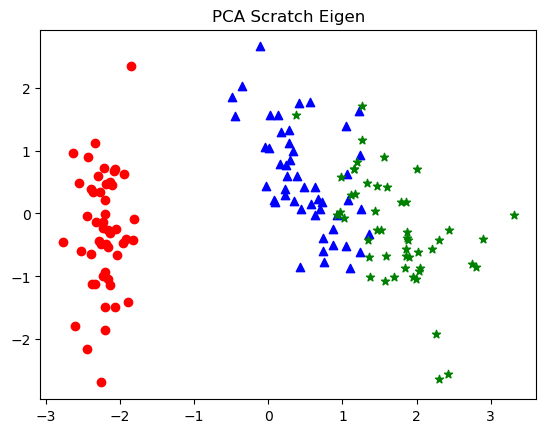

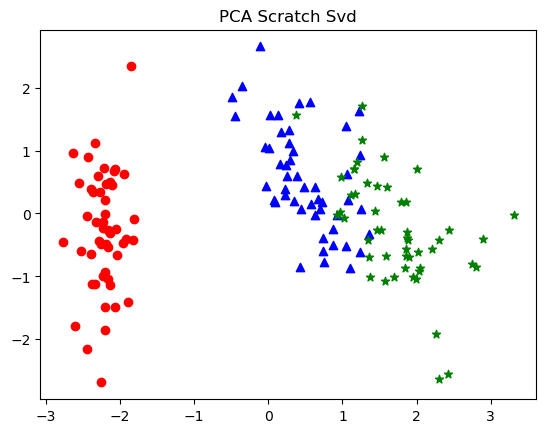

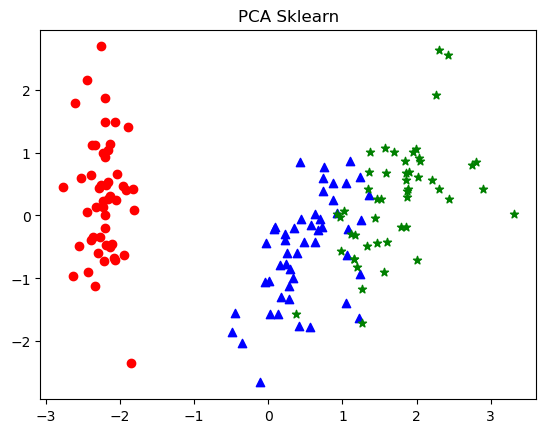

In [215]:
from lib.pca import plot_pca

plot_pca(
    pca_scratch_eigen_transformed[: ,0],
    pca_scratch_eigen_transformed[:, 1], 
    data_array[:, 4],
    title="PCA Scratch Eigen"
)


plot_pca(
    pca_scratch_svd_transformed[: ,0],
    pca_scratch_svd_transformed[:, 1],
    data_array[:, 4], 
    title='PCA Scratch Svd'
)

plot_pca(
    pca_sklearn_transformed[: ,0],
    pca_sklearn_transformed[:, 1],
    data_array[:, 4],
    title="PCA Sklearn",
)


(edited 25 nov, on mentor request)

As you could see in the graphs above there isn't much difference between the methods for PCA. Nevertheless, the result is as I would describe it - "the projection of the initial 3 features distribution on a 2d plane", where is clearly seen the clusters from above.

> PCA could also be described as the projection of features from n-dimensions to an m-dimensions where m<n.

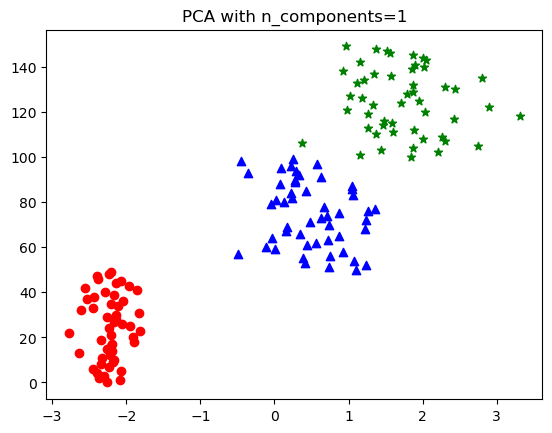

In [216]:

pca_sklearn_1 = PCA(n_components=1)
pca_sklearn_1.fit(data_scaled_X)

pca_sklearn_transformed_1 = pca_sklearn_1.transform(data_scaled_X)

plot_pca(    
    pca_sklearn_transformed_1[:, 0], 
    np.arange(pca_sklearn_transformed_1.size),
    data_array[:, 4],
    title="PCA with n_components=1"
)

As could be observed the lower is n_components the fewer data are maintained. Again it's an projection from 3d to 1d. (Y-axis is the index of data)   

In [217]:
pca_sklearn.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [218]:
pca_sklearn_1.explained_variance_ratio_

array([0.72962445])

Here was asked to create a line plot with `explained_variance_ratio_`. But I don't know how to do that, despite the fact this parameter gives us the understanding of how many components we can keep. It shows the proportion of variance of each component in comparing to original data. It's useful when we need to determine the nr of components to leave.    

# Subtask 2

In [219]:
digits = datasets.load_digits(as_frame=True)
X, y = digits.data, digits.target

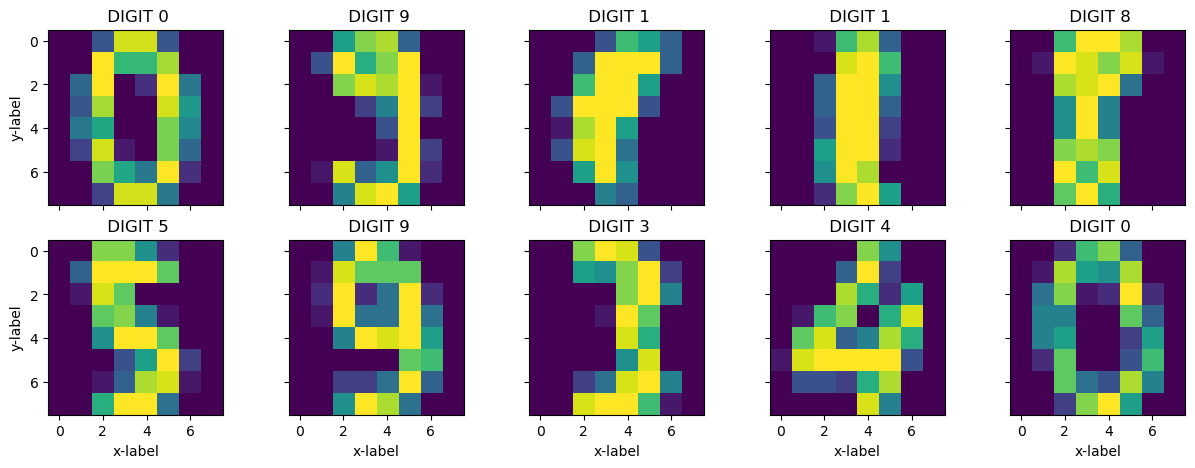

In [220]:
# plot in a multiple window plot 10 random digits with a title having the digit from the image on a 2 x 5 grid

# get 10 random digits from dataset
max_random_value = X.shape[0]
random_numbers = np.random.randint(max_random_value, size=(2,5)) # generate a np.array of 2x5 with random integers from 0 to max_random_value

fig, axs = plt.subplots(2,5, figsize=(15, 5))

for (x_axes, y_axes), value  in np.ndenumerate(random_numbers): # for every item in array
    # x and y is the position of the value in array and I will use it for position in plot grid
    
    digit_label = y[value]
    digit_image = digits.images[value]
   
    axs[x_axes, y_axes].imshow(digit_image)
    axs[x_axes, y_axes].set_title(f" DIGIT {digit_label}") # set name of plot

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
     ax.label_outer()

Some examples how data look in the datasets. it's a 7x7 pictures of handwritten digits. 

In [221]:
sklearn_PCA = PCA(n_components=2) # creating an instance of PCA

In [222]:
# applying scaling 
scaler = StandardScaler()
scaler.fit(X) 

data_scaled_X = scaler.transform(X)

In [223]:
# training and applying PCA transform 
sklearn_PCA.fit(data_scaled_X)

digits_transformed = sklearn_PCA.transform(data_scaled_X) 

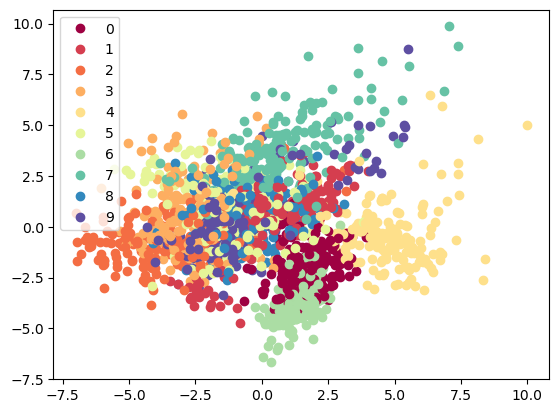

In [225]:
fig, ax = plt.subplots()

colors = [
    "#9e0142", # 0
    "#d53e4f", # 1
    "#f46d43", # 2
    "#fdae61", # 3
    "#fee08b", # .
    "#e6f598", # .
    "#abdda4", # .
    "#66c2a5",
    "#3288bd",
    "#5e4fa2",
    "#ffffff", # 9
]

for i in range(digits_transformed.shape[0]): # iterate in range of total rows
    row = digits_transformed[i] # getting values of row
    target = digits['target'][i] # getting the digit
    ax.plot(row[0], row[1], 'o', color=colors[target]) # 
    
plt.legend([x for x in range(10)], loc='upper left')    
plt.show()

In [226]:
sklearn_PCA.explained_variance_ratio_

array([0.12033916, 0.09561054])

This graph represents some limitations of the PCA. 
First of all as you could notice the plot is a mess. 
> PCA assumes the data has linear relationships

If there is not a strong linear relationship then it would not be very useful.  As could have remark there isn't much to get from here. Yes there are groups that could be spot but overall 1,9,5 and others are undistinguished. 
Even the `variance_ratio` tells a lot about the final result.  

> variance_ration should sum up to 1 for no information lost

### Conclusion

In summary PCA is a great tool for reducing dimensions dataset if the features are strongly linear. But it varies from one to one and should be used accordingly. 